## Implementation of Logistic Regression using Python

## Import Libraries

In [23]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc


## Read and Explore the data

In [24]:
# Load the diabetes dataset
diabetes = load_diabetes()
X, y = diabetes.data, diabetes.target
 
# Convert the target variable to binary (1 for diabetes, 0 for no diabetes)
y_binary = (y > np.median(y)).astype(int)

## Splitting The Dataset: Train and Test dataset

In [25]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y_binary, test_size=0.2, random_state=42)

## Feature Scaling

In [26]:
# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Train The Model

In [49]:
# Train the Logistic Regression model
model = LogisticRegression(C=0.01,penalty='l2',max_iter=200 ) # default c=1.0, C is regurlization to prevent overfitting by penalizing large coefficients
# Penality= 'l1 or l2, or none' , defult =l2, # Penalty refers to the type of regularization applied to the model.
model.fit(X_train, y_train)

LogisticRegression(C=0.01, max_iter=200)

## Evaluation Metrics

In [50]:
# Evaluate the model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 77.53%


## Confusion Matrix and Classification Report

In [51]:
# evaluate the model
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Confusion Matrix:
 [[39 10]
 [10 30]]

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.80      0.80        49
           1       0.75      0.75      0.75        40

    accuracy                           0.78        89
   macro avg       0.77      0.77      0.77        89
weighted avg       0.78      0.78      0.78        89



## Visualizing the performance of our model.

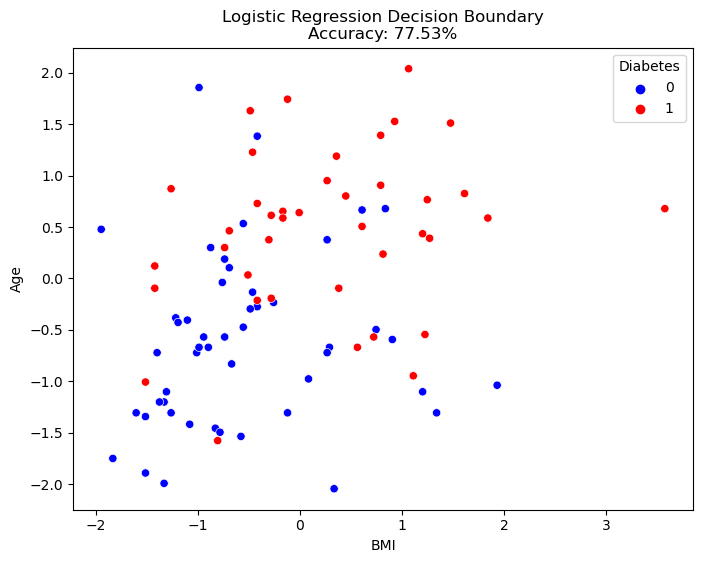

In [52]:
# Visualize the decision boundary with accuracy information
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_test[:, 2], y=X_test[:, 8], hue=y_test, palette={
                0: 'blue', 1: 'red'}, marker='o')
plt.xlabel("BMI")
plt.ylabel("Age")
plt.title("Logistic Regression Decision Boundary\nAccuracy: {:.2f}%".format(
    accuracy * 100))
plt.legend(title="Diabetes", loc="upper right")
plt.show()

## Plotting ROC Curve

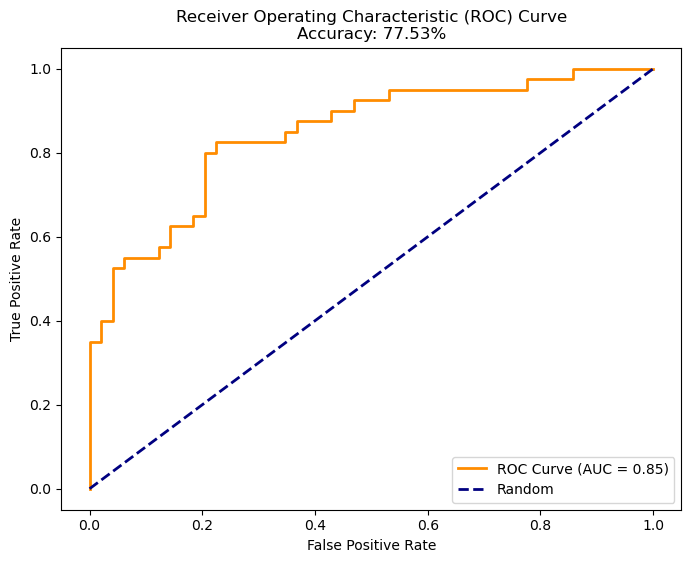

In [53]:
# Plot ROC Curve
y_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
 
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2,
         label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve\nAccuracy: {:.2f}%'.format(
    accuracy * 100))
plt.legend(loc="lower right")
plt.show()